<h1><center>Bank Chuners Analysis</center></h1>


## Objectives:
- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
- Generate a set of insights and recommendations that will help the banks


## Data Attributes 
- CLIENTNUM:               Client number. Unique identifier for the customer holding the account
- Attrition_Flag:          Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age:            Age in Years
- Gender:                  Gender of the account holder
- Dependent_count:         Number of dependents
- Education_Level:         Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, - College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status:           Marital Status of the account holder
- Income_Category:          Annual Income Category of the account holder
- Card_Category:            Type of Card
- Months_on_book:           Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon:   No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit:             Credit Limit on the Credit Card
- Total_Revolving_Bal:      The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy:          Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt:          Total Transaction Amount (Last 12 months)
- Total_Trans_Ct:           Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1:      Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1:     Ratio of the total transaction amount in 4th quarter and the total
transaction amount in     1st quarter
- Avg_Utilization_Ratio:    Represents how much of the available credit the customer spent

In [1]:
import warnings

warnings.filterwarnings("ignore")
# Libraries for manipulating data
import pandas as pd
import numpy as np

# libaries for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for tuning ML models, and scoring the data 
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler


#librariesfor model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Library to tackle imbalance dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

### Loading Dataset

In [2]:
bank_df = pd.read_csv('BankChurners.csv')  # read csv file
bank_df.head()  # show first 5 rows

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

### Get General infromation about dataframe

In [3]:
bank_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- **Total rows/examples are 10127 in the dataset with 21 Attributes/columns**

- **From above information, it can als be noticed that there are 5 float type columns, 10 integer type columns and only 6 object type columns, these object types are mostprobably strings or it could be mixed numeric and non numeric values.**

- **It can also be noticed that there are no columns with Null value**


### Lets check Unique values in each column

In [4]:
bank_df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

- The above information suggests that column 'CLIENTNUM' have all of the values uniques (No one value is repeated), that means that this value have no impact whatsoever on any of the attributes.
- Let drop this value before moving further

In [5]:
bank_df.drop('CLIENTNUM', axis=1, inplace=True)  # remove column CLIENTNUM
bank_df.head()  # show first 5 rowns

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

- Before jumping to the preprocessing and EDA of the dataset lets first see the summary of numerical valued columns

In [6]:
bank_df.describe().T  # describe gives a statistical view of the dataframe

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

- `Credit_Limit	` has outliers, noticed that the max value of this columns is way higher than 75 percentile.
- `Avg_Open_To_Buy, Total_Trans_Amt, Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1` also have some outliers.

- On average a customer is inactive for 2.3 months in a year. (that is huge)
- On average a customer uses credit card for transaction 64 times over the period of 12 months, spending around 4400 dollars
- On average the customer spends around 27% of the available amount.

### Till now we were tending to numerical columns , Lets now look at categorical columns

In [7]:
# Extracting columns whose data type is object
categorical_col = list(bank_df.select_dtypes(include=['object']).columns)
categorical_col

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

#### There are 6 columns with categorical data lets look at values of these columns.

In [8]:
for col in categorical_col:  # go thorugh each column
    print("Category {} has below unique values with counts".format(col))
    print(bank_df[col].value_counts())  # use value count on that column, pd dataframe will atomatically count different categories in that column
    print('\n\n')

Category Attrition_Flag has below unique values with counts
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64



Category Gender has below unique values with counts
F    5358
M    4769
Name: Gender, dtype: int64



Category Education_Level has below unique values with counts
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64



Category Marital_Status has below unique values with counts
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64



Category Income_Category has below unique values with counts
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64



Category Card_Category has below unique values with counts
Blue        9436
Silver       5

# EDA

### Univariate

In [9]:
def histogram_boxplot(feature, figsize=(15, 10), bins=None):  # creates a histogram
    plt.figure(figsize=(12,7))  # figure size should be 12,7
    plt.hist(feature)  # create a histogram of the given series
    plt.xlabel(feature.name)  # label the x axis of the graph with name of the feature (series object have name (column name)) 
    plt.axvline(feature.mean(), color='k', linestyle='dashed', linewidth=1)  # create an average line by computing mean(avg) of all the values in the series
    plt.show()  # show the graph

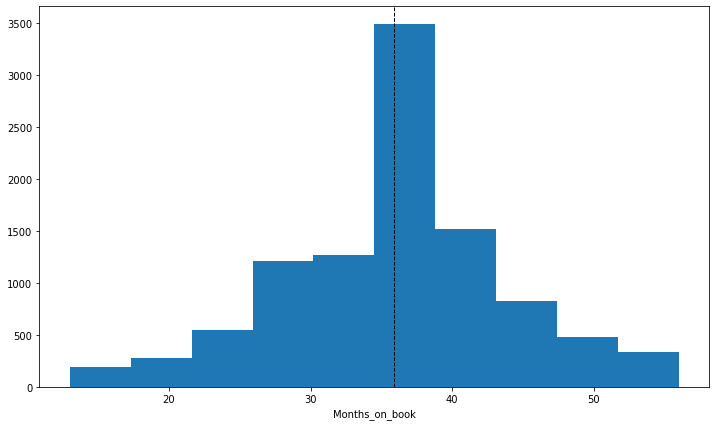

In [10]:
# observation of months on book
histogram_boxplot(bank_df["Months_on_book"]) # calling the histogram boxplot defined above with data of column Months_on_book

- Most of the customers mainly approximately 2500 are with the company for mostly 36 months
- Remainig majority are spread between 20-50 months

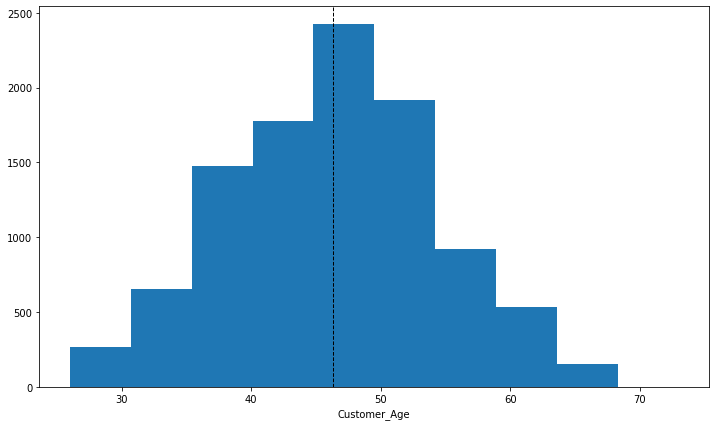

In [11]:
# observation of customer age
histogram_boxplot(bank_df["Customer_Age"])

- Customer Age has a Normal distribution spaning over 30 to 65 year of age. Peaking at 45 and 50

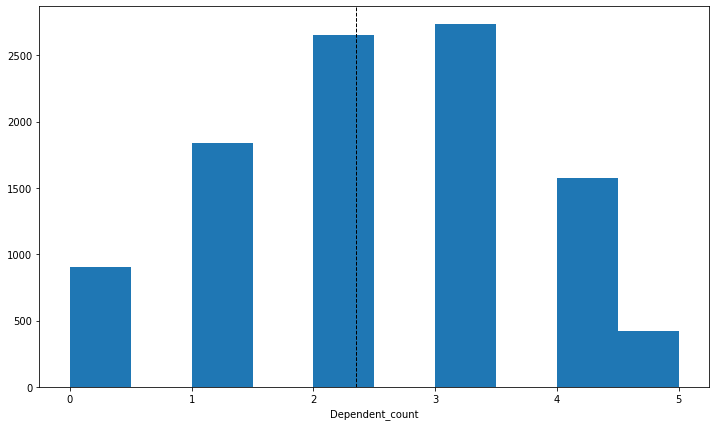

In [12]:
# observation of number of dependents of customer
histogram_boxplot(bank_df["Dependent_count"])

- Dependent_count means people/persons depending on the customers.
- Most customers have 2-3 dependents according to the data

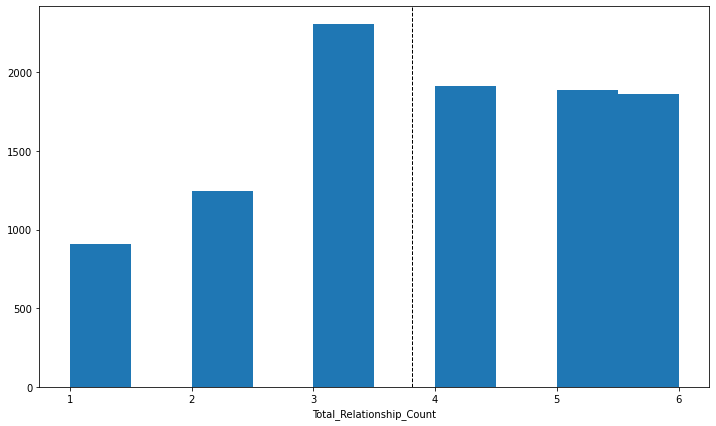

In [13]:
# observation of number of products customer holds
histogram_boxplot(bank_df["Total_Relationship_Count"])

- The data is at peak around 3 and is approximately equally spread over 4,5 and 6 products which are held by customer

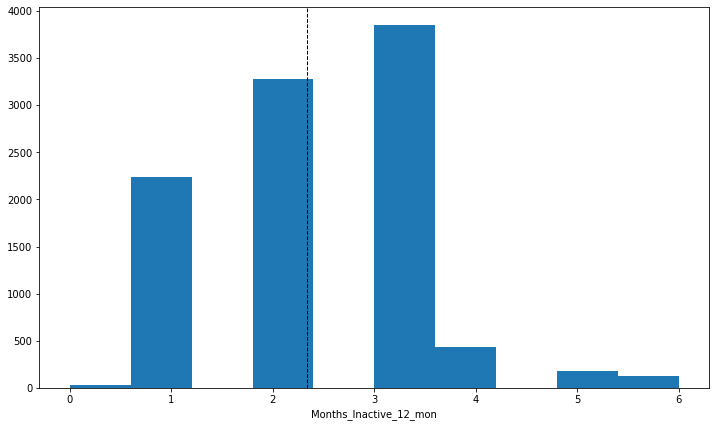

In [14]:
# observation of number of inactive months
histogram_boxplot(bank_df["Months_Inactive_12_mon"])

- Most customer are inactive for around 1-3 months in the last 12 months

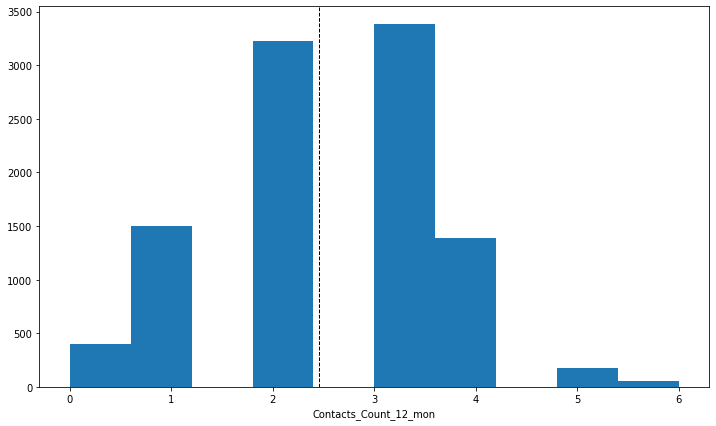

In [15]:
# observation of number of contacts between the bank and customer
histogram_boxplot(bank_df["Contacts_Count_12_mon"])

- In the last 12 months there are mostly 2-3 contacts that happend between the customer and the bank.

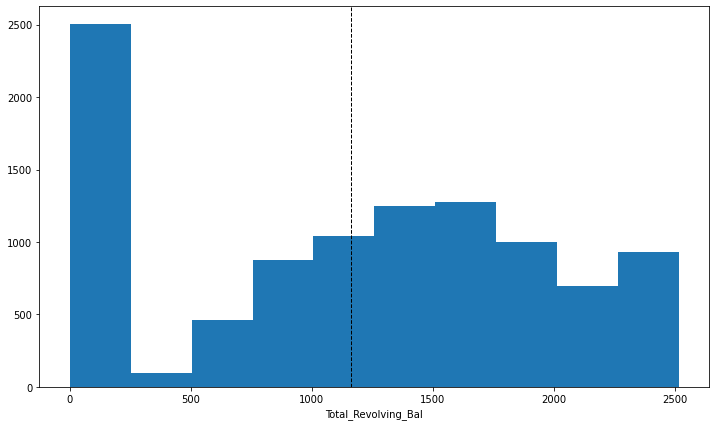

In [16]:
# observation of Total_Revolving_Bal
histogram_boxplot(bank_df["Total_Revolving_Bal"])

- Total revolving balance is when a customer monthly balance is carried over from one month to the next.
- Approximately 2500 customer have 0 balance that they take to next month.
- 2nd most but not as much as above, Customer takes around 2500 Dollars to the next month

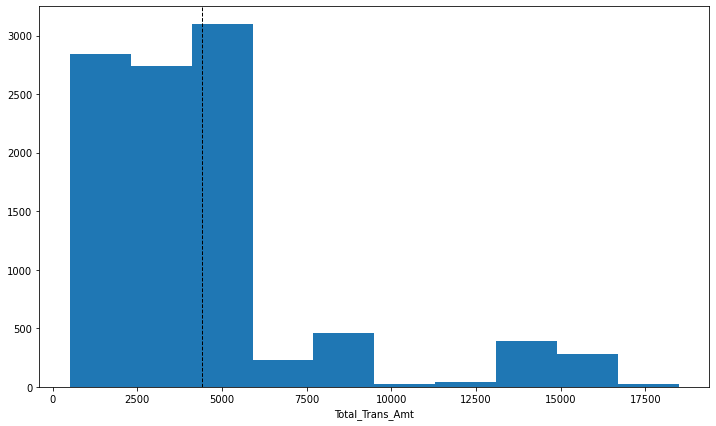

In [17]:
# observation of Total_Trans_Amt
histogram_boxplot(bank_df["Total_Trans_Amt"])

- Total transcations that happend by all customers lies between 800-5500 Dollars

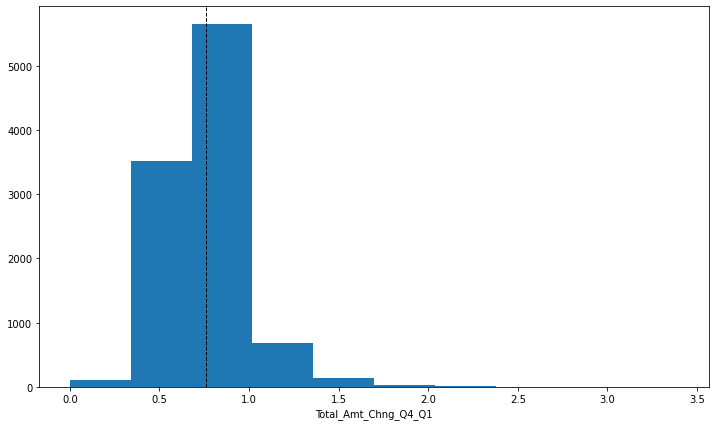

In [18]:
# observation of Total_Amt_Chng_Q4_Q1
histogram_boxplot(bank_df["Total_Amt_Chng_Q4_Q1"])

In [19]:
# removing outliers
bank_df.drop(index=bank_df[bank_df['Total_Amt_Chng_Q4_Q1']> 2.0].index, inplace=True)

- The data have some outliers.
- Without outliers that data seems to be normally distributed.
- it seems that at the 4th quarter of the year the Customers spends around 0.5 - 1.0 (50%-100%) of the amount spend in 1st quarter of the year

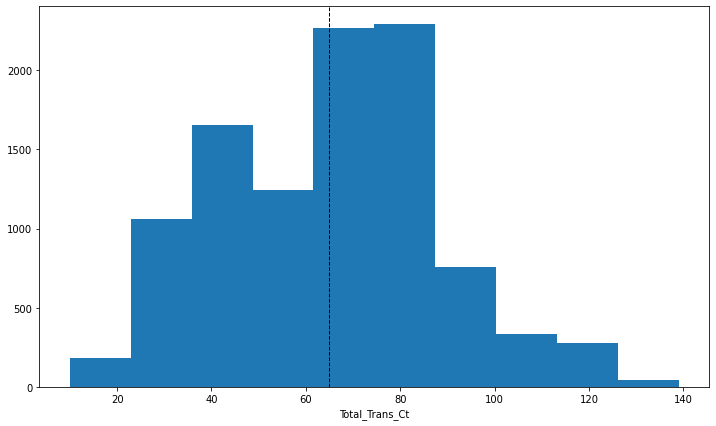

In [20]:
# observation of Total_Trans_Ct
histogram_boxplot(bank_df["Total_Trans_Ct"])

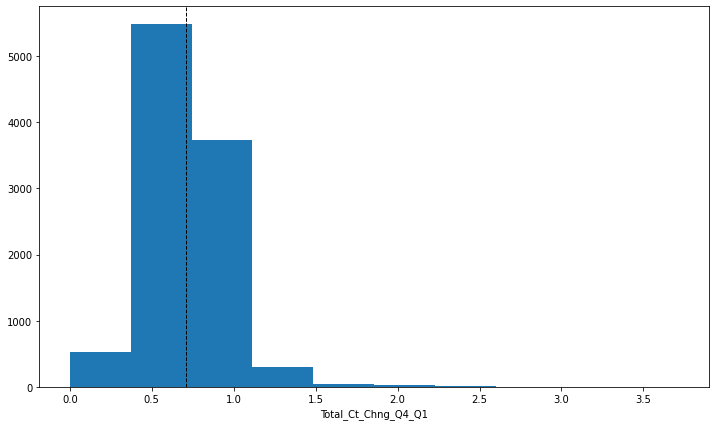

In [21]:
# observation of Total_Ct_Chng_Q4_Q1
histogram_boxplot(bank_df["Total_Ct_Chng_Q4_Q1"])

In [22]:
# removing outliers
bank_df.drop(index=bank_df[bank_df['Total_Ct_Chng_Q4_Q1']> 2.0].index, inplace=True)

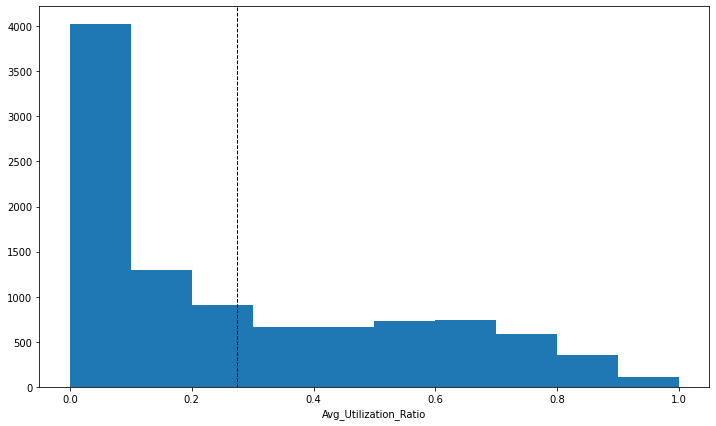

In [23]:
# observation of Avg_Utilization_Ratio
histogram_boxplot(bank_df["Avg_Utilization_Ratio"])

- The graph is right skewed. The data represents "how much of the available credit the customer spent"
- and it seems the ratio is widely spread but most of the times customer spends around 0.0-0.2

In [24]:
def perc_on_bar(feature): # create a bar graph with percentage

    sns.set(rc={"figure.figsize": (10, 5)})  # set size of the figure using sns
    ax = sns.countplot(x=feature, data=bank_df)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

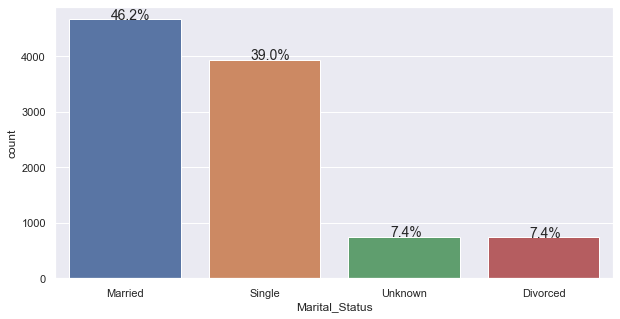

In [25]:
# observations on Marital_Status
perc_on_bar(bank_df["Marital_Status"])  # call the above perc_on_bar with column Martial Status

- Most of the customers are Married or single
- Unknownd and Divorced only contirbute 7.4% each to the overall customers

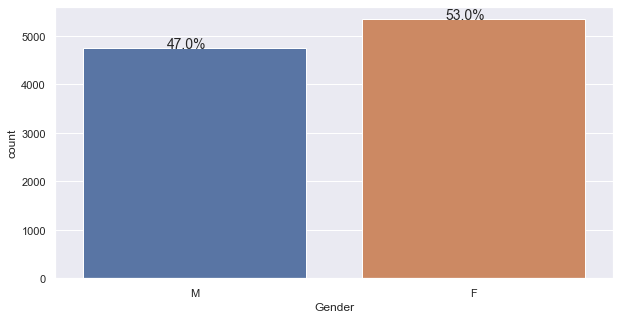

In [26]:
# observations on Gender
perc_on_bar(bank_df["Gender"])

- Females Customer are more compared to men

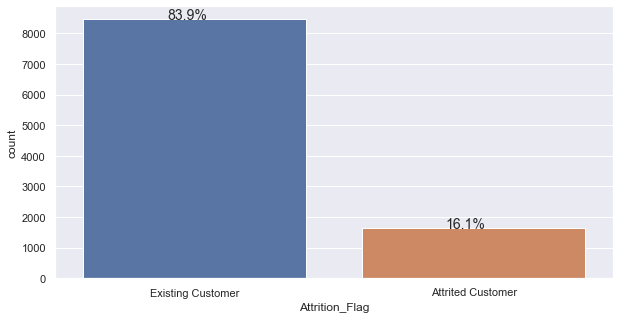

In [27]:
# observations on Attrition_Flag
perc_on_bar(bank_df["Attrition_Flag"])

- The data is imblanaced as there are very few examples in Attrited Customer then Existing Customer
- We will tackle this imblanced dataset problem later in Data preparation process

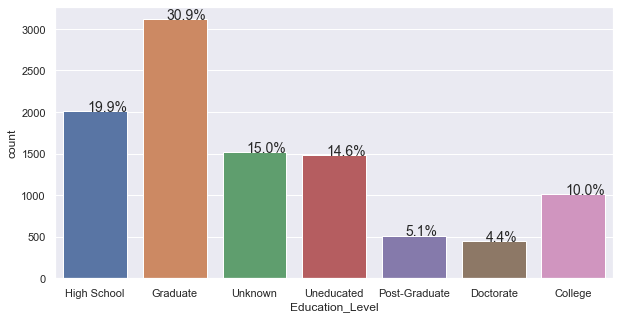

In [28]:
# observations on Marital_Status
perc_on_bar(bank_df["Education_Level"])

- Yes, Graduates, they top the list, Graduates contribute to ~31% of the Customers
- Then High School and so.

### Bivariate Analysis

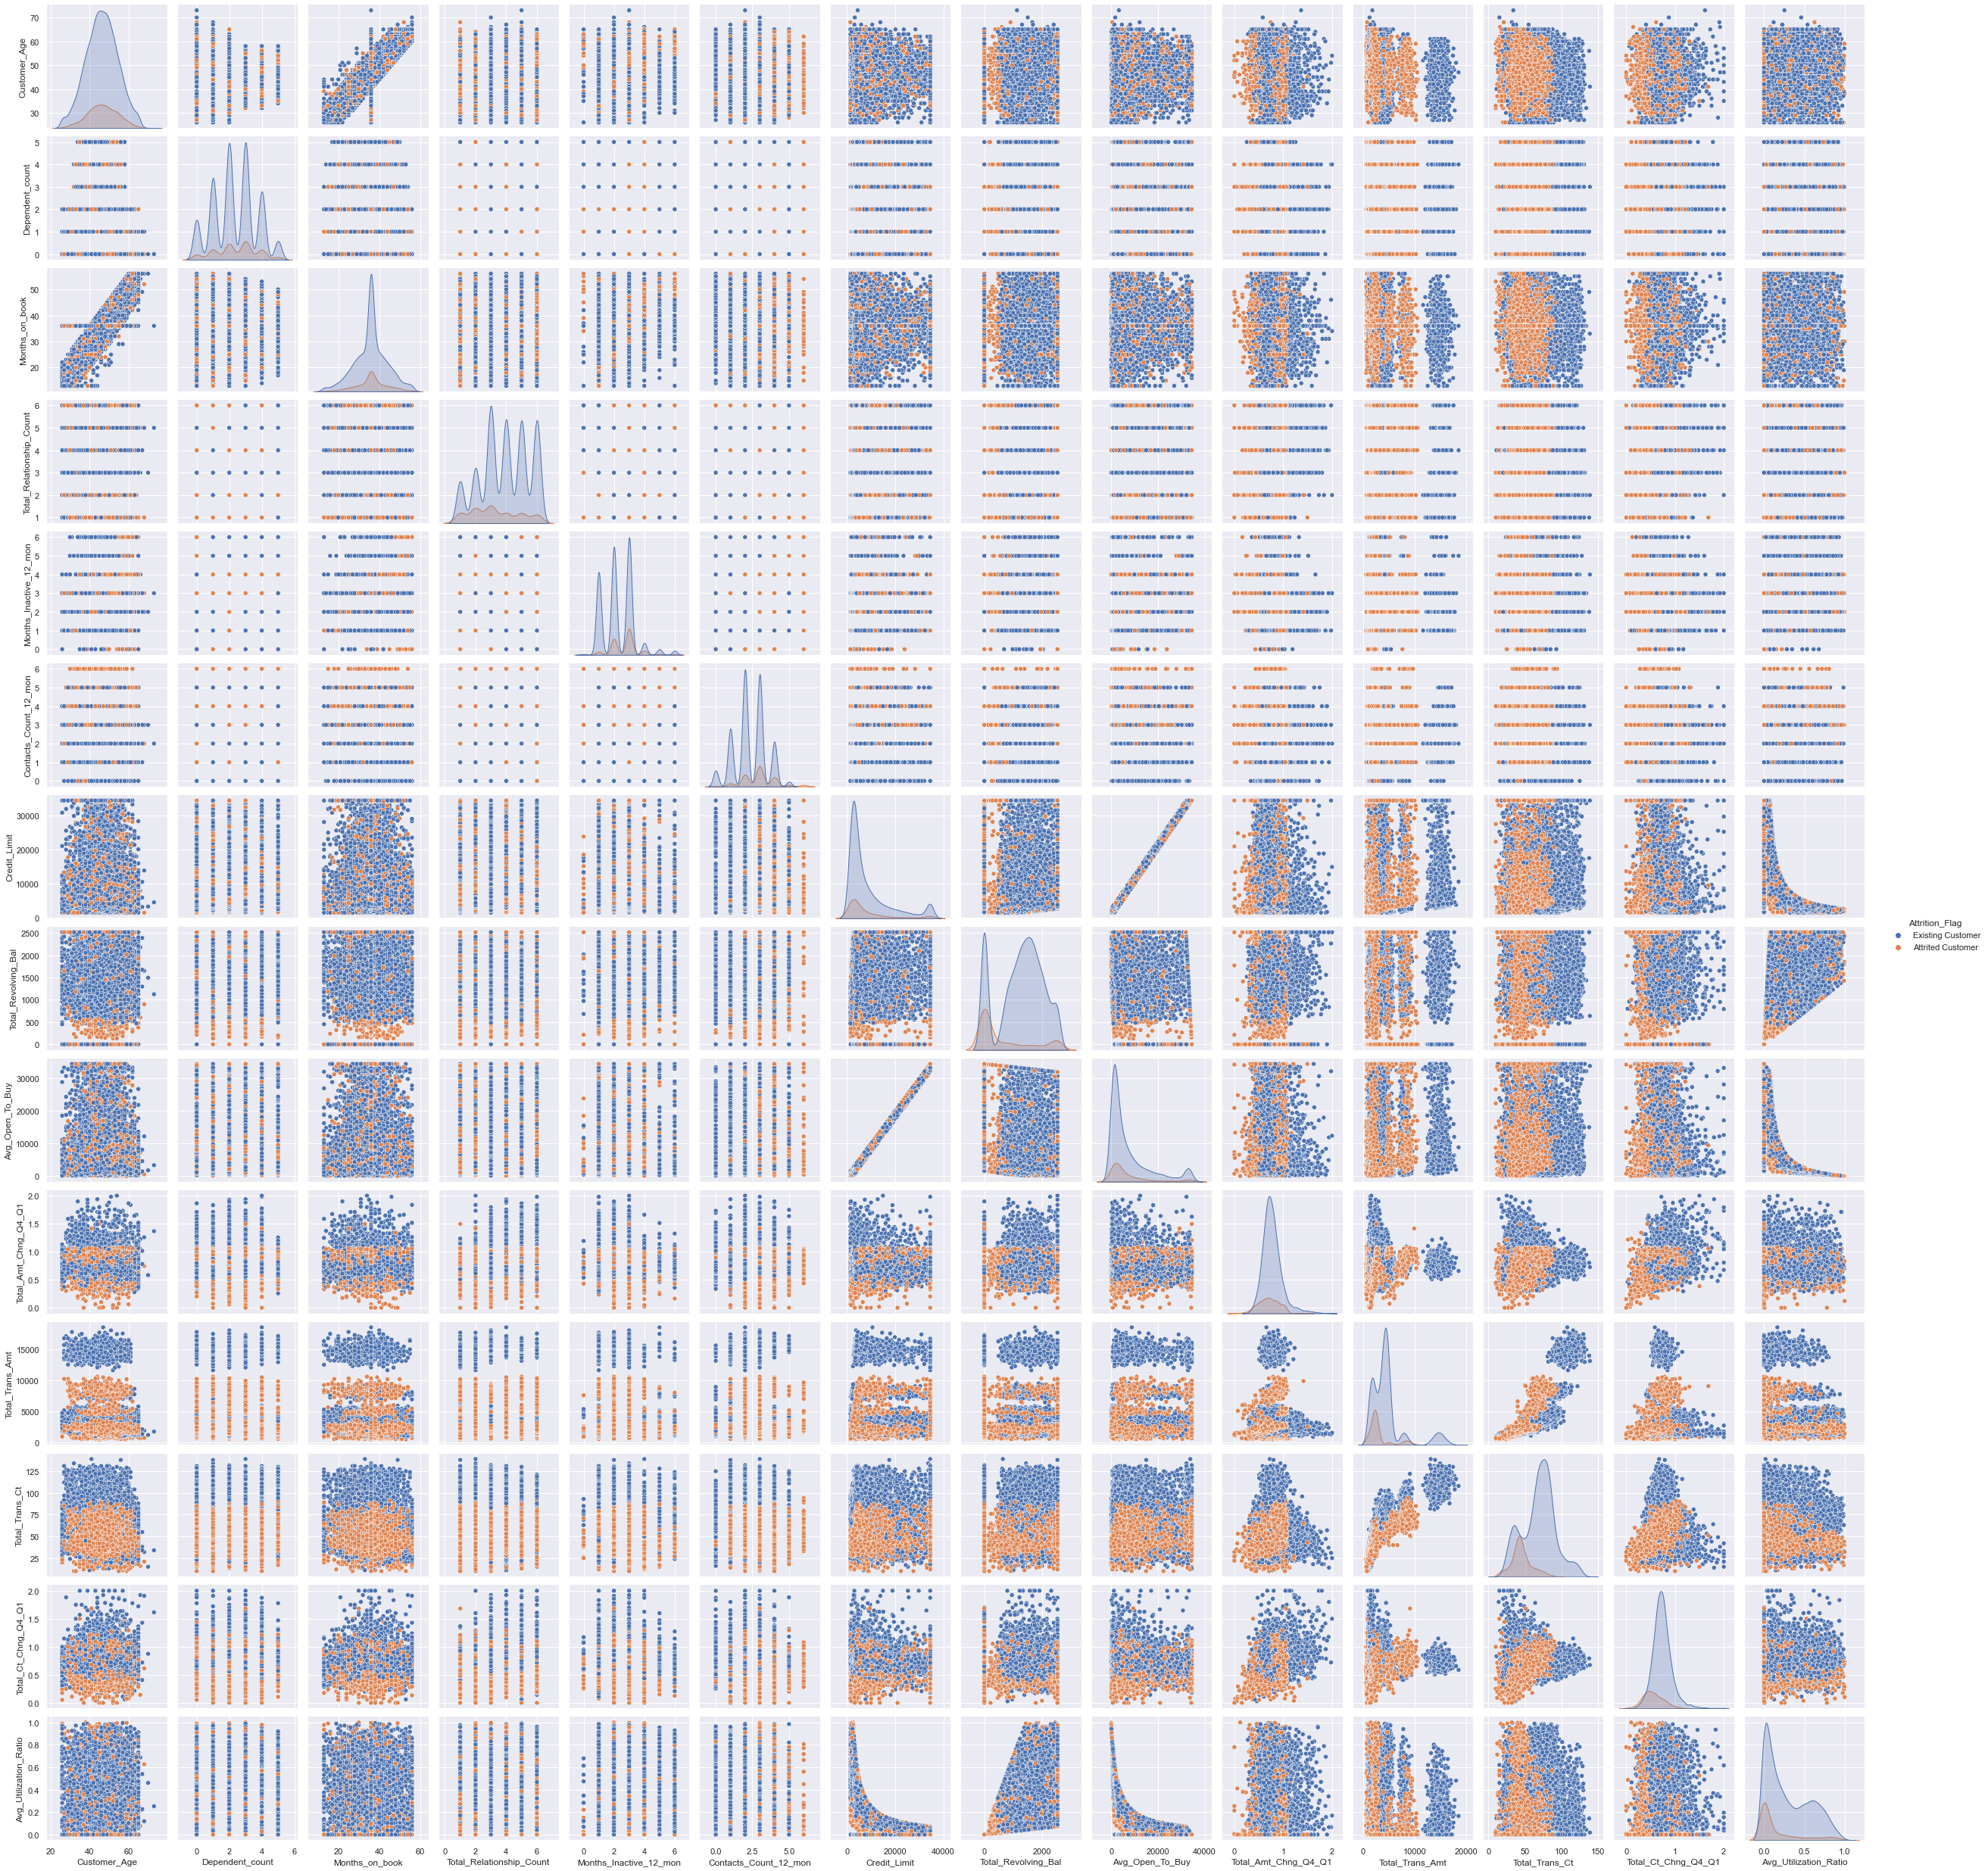

In [29]:
sns.pairplot(bank_df, hue="Attrition_Flag")  # sns.paiplot creates a coorelation matrix, where a person can see the relation of each column with another

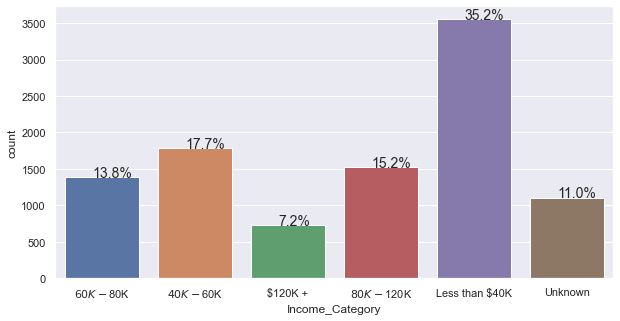

In [30]:
# observations on Income_Category
perc_on_bar(bank_df["Income_Category"])  # again using perc_on_bar to create graph

- Most of the customer of the bank are making less than 40K Dollars a year.
- It can be observed that 50% of the customer make 60K or less Dollars a year

- Blue cards are held by majority customers

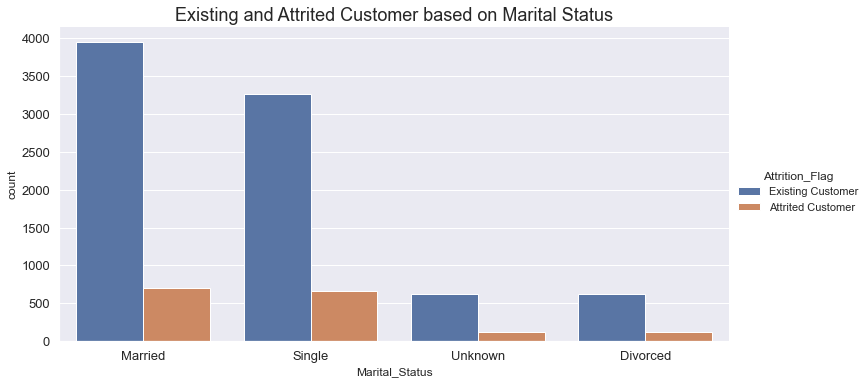

In [31]:
# Observation of Marital Status and Attrition Flag
sns.catplot(data=bank_df, kind='count', 
                   x='Marital_Status', hue='Attrition_Flag', aspect=8.7/4.27 )  # here caplot is created where hue(which is different category in a column is Atrrition flag)
                # now in above line martial status in on x axis, and hue is Attrition flag, now it will compute each martial status of customer according to either being existing or attrited Customers and compare them.
plt.title("Existing and Attrited Customer based on Marital Status", fontsize=18)  # title of the graph
plt.xticks(fontsize=13)  # ticks size of the x axis
plt.yticks(fontsize=13)  # ticks size of y axis
plt.show()

- Graph describes the Existing and Attrited Customers based upon the 4 categories of Marital Status
- It seem that most attrited Customer are Married ones despite them to be the majority Existing Customers

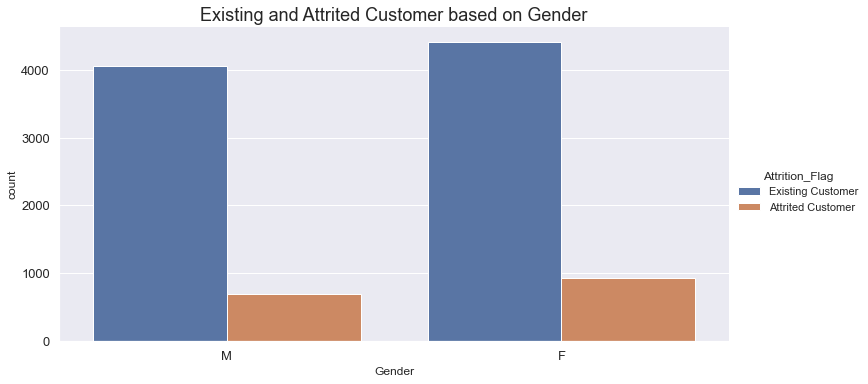

In [32]:
# Observation of Gender and Attrition Flag
sns.catplot(data=bank_df, kind='count', 
                   x='Gender', hue='Attrition_Flag', aspect=8.7/4.27 )  # same as above this time x axis is Gender column
plt.title("Existing and Attrited Customer based on Gender", fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

- It seems Gender has not much influence on Attrited/Existing Customer

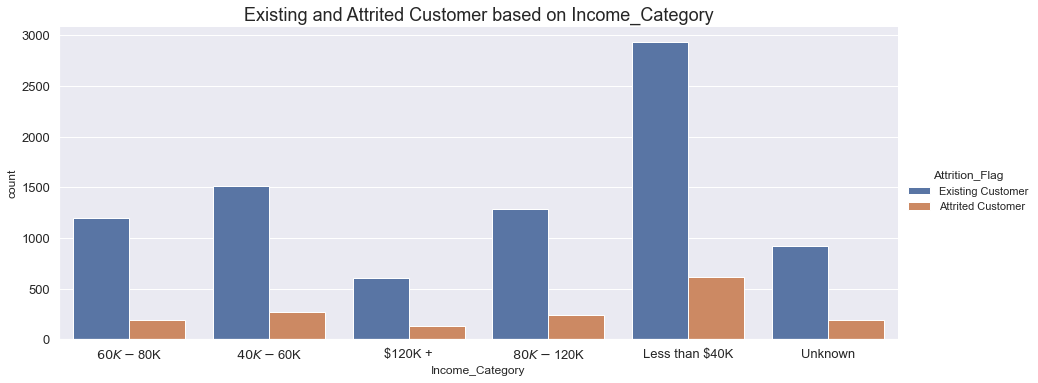

In [33]:
# Observation of Marital Status and Attrition Flag
sns.catplot(data=bank_df, kind='count', 
                   x='Income_Category', hue='Attrition_Flag', aspect=10.7/4.27 )  # same as above, though this time column is Incoe Category 
plt.title("Existing and Attrited Customer based on Income_Category", fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show() 

In [34]:
def bar_graph(attribute):  # create a bar graph
    plt.figure(figsize=(10,6))  # size of the graph
    sns.barplot(x=attribute, y='Total_Trans_Amt', data=bank_df)  #using sns create a bar grpah, with x as passed column and y as Total_Trans_amt
    plt.title('Total Transaction amount based on {}'.format(attribute))  # title of the graoh
    plt.show()

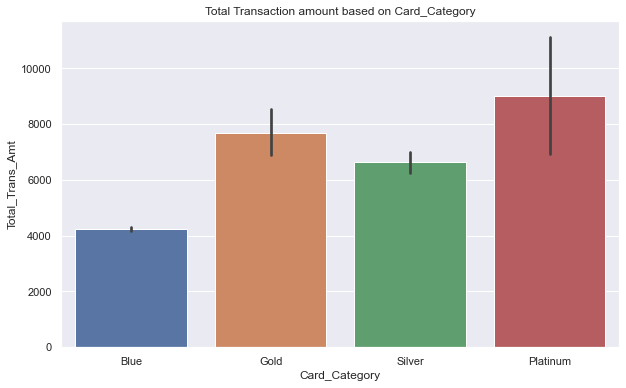

In [35]:
bar_graph('Card_Category')  # above fucntion is called with column Card_category

- This Graph conveys very important information, that `Platinum` Customer spends almost double of what `Blue` Card holders spends
- `Gold` Customer are the 2nd most spender and then `Silver`, lastly `Blue`

- It seems though, `Education Level` has no impact on the spending

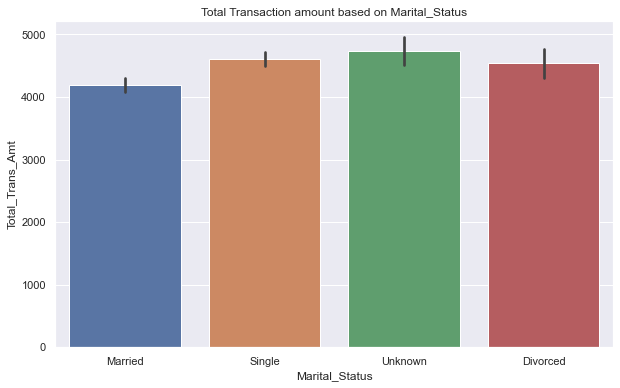

In [36]:
bar_graph('Marital_Status')

- Unknown, are spending more than anyother category ( they could be either of the 3 categories)
- `Singles` and `Divorced` are spending little more than `Married Customers`

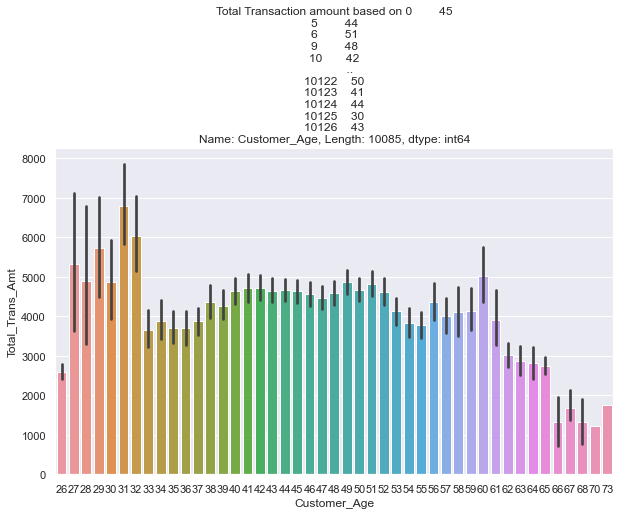

In [37]:
bar_graph(bank_df['Customer_Age'])

- Customer between the age of 27-32 spends the most then age ranging from 40-52 spends not as much as the one before but do spends quite handsomly. Bank should not use resources on Customer aging 62+. 

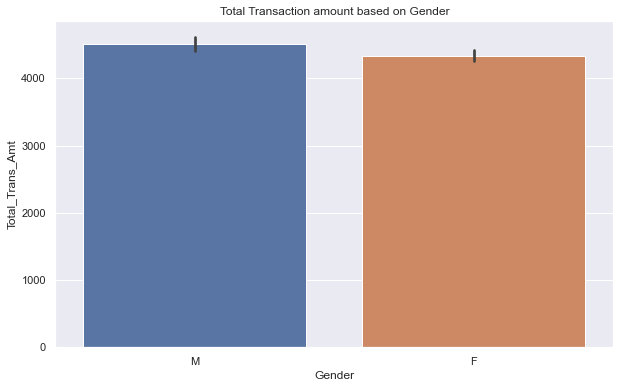

In [38]:
bar_graph('Gender')

- Although, there are more Female Customers, the males are spending more the females

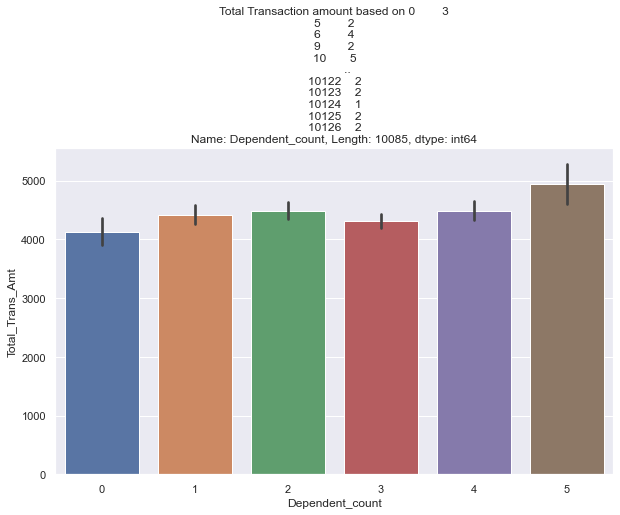

In [39]:
bar_graph(bank_df['Dependent_count'])

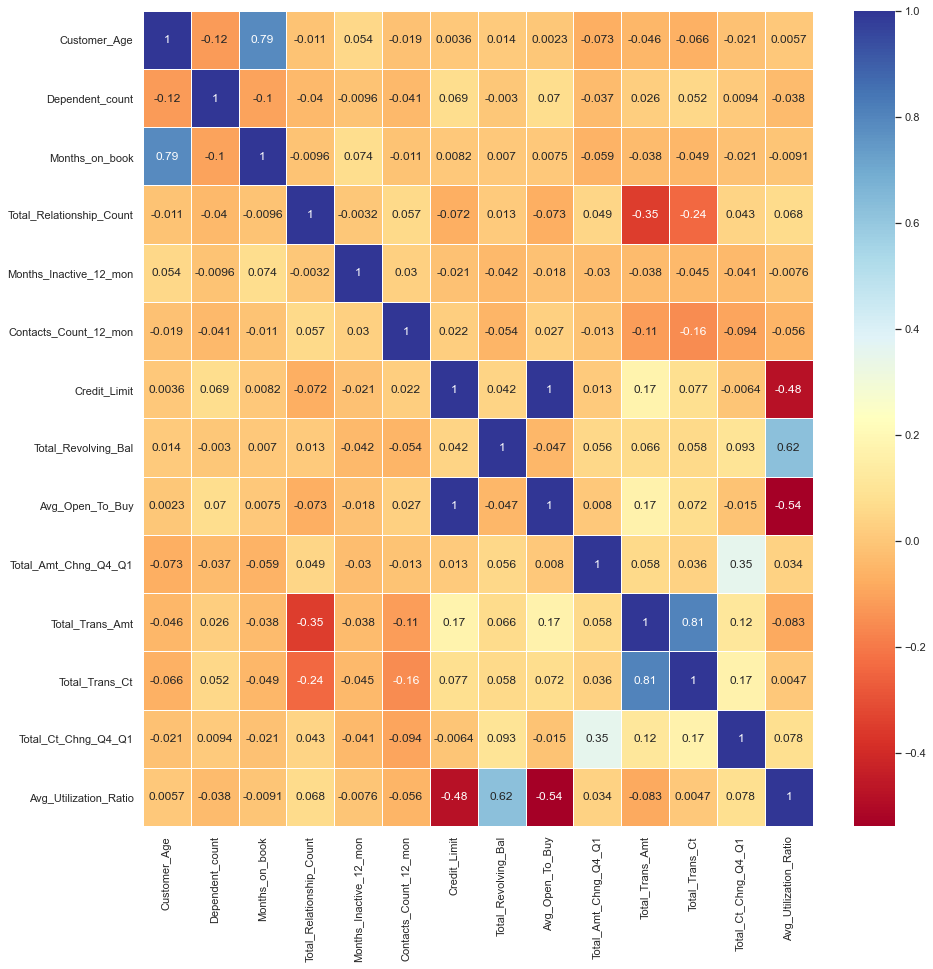

In [40]:
sns.set(rc={"figure.figsize": (15, 15)})  # again set the size of graph
sns.heatmap( bank_df.corr(), annot=True, linewidths=0.5, cmap="RdYlBu")  # here a heat map is used, it is same as pairplot though here the corealtion is shown in numbers instead of scatterplots or distribution plots
plt.show()

- It can be seen that `Credit_Limit` and `Avg_Open_To_Buy` are 100% correlated to each other
- `Total_Trans_amt` is positively correlted to `Total_Trans_ct`
- `Total_Trans_amt` is negatively correlated to `Total_Relationship_Count`
- It seems though `customer age` is positively related to `months on book`.
- It can also be noticed that `Total_revolving_bal` is very positively correlated to `Avg_Utilization_Ratio`

**Postive correlation** means that when ever one attribute increases the other also Increases and vice versa for **Negative Correlation**

#### From above heatmap it can be seen that attribute 'Avg_Open_To_Buy' and 'Credit_Limit' have coorelation of 100% or 1, meaning they are almost identical, so we can remove any one of the columns.

In [41]:
bank_df.drop('Avg_Open_To_Buy', axis=1, inplace=True) # drop Avg_Open_To_Buy column
bank_df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0   Existing Customer            45      M                3     High School   
5   Existing Customer            44      M                2        Graduate   
6   Existing Customer            51      M                4         Unknown   
9   Existing Customer            48      M                2        Graduate   
10  Existing Customer            42      M                5      Uneducated   

   Marital_Status Income_Category Card_Category  Months_on_book  \
0         Married     $60K - $80K          Blue              39   
5         Married     $40K - $60K          Blue              36   
6         Married         $120K +          Gold              46   
9          Single    $80K - $120K          Blue              36   
10        Unknown         $120K +          Blue              31   

    Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                          5                       1                      3   
5                          3                       1                      2   
6                          6                       1                      3   
9                          6                       3                      3   
10                         5                       3                      2   

    Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0        12691.0                  777                 1.335             1144   
5         4010.0                 1247                 1.376             1088   
6        34516.0                 2264                 1.975             1330   
9        11656.0                 1677                 1.524             1441   
10        6748.0                 1467                 0.831             1201   

    Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0               42                1.625                  0.061  
5               24                0.846                  0.311  
6               31                0.722                  0.066  
9               32                0.882                  0.144  
10              42                0.680                  0.217

## Data Preparation


### Encoding Categorical data manually

In [42]:
Attrition_Flag = {'Existing Customer': 0, 'Attrited Customer':1}  # now before training the model we want the data to be in numerical form instead of categorical
bank_df['Attrition_Flag'] = bank_df['Attrition_Flag'].map(Attrition_Flag)  # we are using above dictionary to map Existing Customer with 0 and Attrited Customer with 1

gender = {'M':1, 'F':2}  # doing the same to all other categorical data
bank_df['Gender'] = bank_df['Gender'].map(gender)

Education_Level = {'High School':1, 'Graduate':2, 'Uneducated':3, 'Unknown':4, 'College':5, 'Post-Graduate':6, 'Doctorate':7}
bank_df['Education_Level'] = bank_df['Education_Level'].map(Education_Level)

Marital_Status = {'Married':1, 'Single':2, 'Unknown':3, 'Divorced':4}
bank_df['Marital_Status'] = bank_df['Marital_Status'].map(Marital_Status)

Card_Category = {'Blue':1, 'Gold':2, 'Silver':3, 'Platinum':4}
bank_df['Card_Category'] = bank_df['Card_Category'].map(Card_Category)

Income_Category = {'$60K - $80K':3, 'Less than $40K':1, '$80K - $120K':4, '$40K - $60K':2, '$120K +':5, 'Unknown':0}
bank_df['Income_Category'] = bank_df['Income_Category'].map(Income_Category)

### Before spliting the dataset into training and testing dataset, we need to be sure that the dataset is balanced

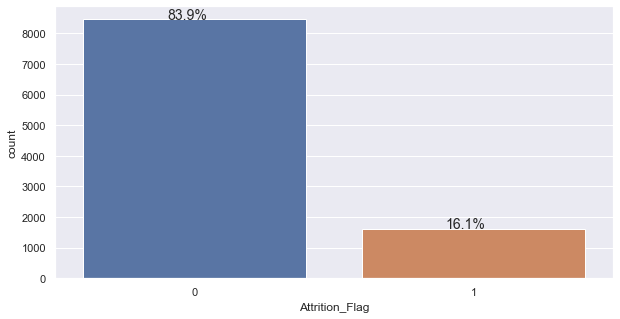

In [43]:
# observations on Marital_Status
perc_on_bar(bank_df["Attrition_Flag"])  # again using the perc_on_bar we create a bar graph

#### As we recall we have seen this graph above, though we will be tackling the problem in this data preperation portion.
**We have 2 scenerios**
1. **Either increase the `Attrited Customer` to balance the dataset**
2. **Derease the `Existing Customer`, examples to match the `Attrited Customer` examples**

### We are going with the 2nd option becuase the first option will create many duplicatest and that might lead to over fitting the model, which we don't want.

In [44]:
# Separating target variable and other variables
X = bank_df.drop(columns="Attrition_Flag") # drop Attrition_Falg column and all other values are save to X
Y = bank_df["Attrition_Flag"]  # attrition flag is saved to y (we drop the Attrition falg but we didn't assign it to df so it was not save only in X it doesnt exists)

In [45]:
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.76)  # using imlearned Undersample intialize it
oversample = RandomOverSampler(sampling_strategy=0.76)

# fit and apply the transform
X_under, Y_under = undersample.fit_resample(X, Y)  # use the above undersample and the data is reduced from the 0(exitsing customer class) so it can be balanced
X_over, Y_over = oversample.fit_resample(X, Y)  # in here the Attrition customer data is duplicated and increased so the dataset can be balanced

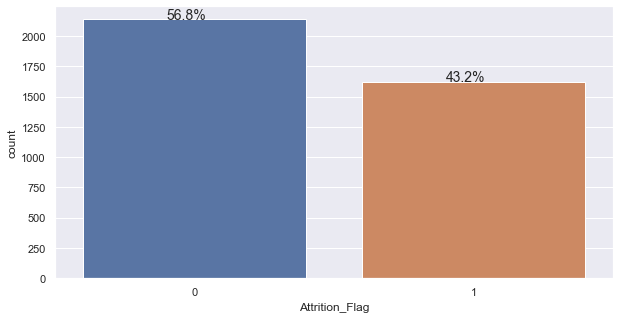

In [46]:
# observations on Marital_Status
perc_on_bar(Y_under) # as shown here, we can see that the 0 count has com to aroun 2200 from 8000
# X_over

### No it seems better, Also we have decreased the 0 values.
- 0 - Existing Customers
- 1- Attrited Customers

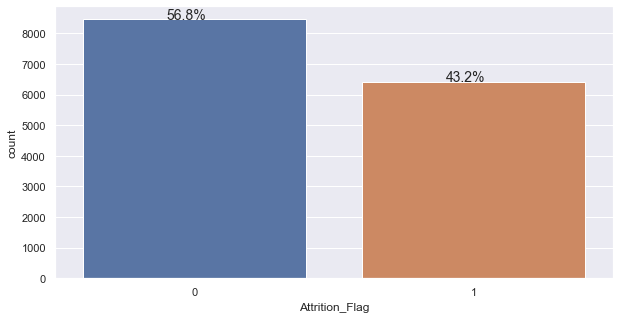

In [47]:
# observations on Marital_Status
perc_on_bar(Y_over)
# X_over

### No it seems better, Also we have increased the 1 values.
- 0 - Existing Customers
- 1- Attrited Customers

In [48]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify=Y)
print(X_train.shape, X_test.shape)

(8068, 18) (2017, 18)


In [49]:
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, Y_over, test_size=0.20, random_state=1, stratify=Y_over)
print(X_over_train.shape, X_over_test.shape)

(11911, 18) (2978, 18)


In [50]:
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under, Y_under, test_size=0.20, random_state=1, stratify=Y_under)
print(X_under_train.shape, X_under_test.shape)

(3010, 18) (753, 18)


#### As we know our data set have no missing data so we will skip this step

### Before going to try different Models, Lets first do following
1. Train Logistic Regressionon on imbalanced dataset 
2. Train LR again, but this time on dataset with oversample data
3. Train again though the dataset have undersample data
4. Get insights of which dataset is better

In [60]:
def lr(model, X, y, X_test, y_test):  # linear regression model 
    model.fit(X, y)  # train the model
    pred_train = model.predict(X) # predict the X train values
    pred_test = model.predict(X_test)  # predict the X test values

    train_acc = model.score(X, y)  # calculate the Train value score
    test_acc = model.score(X_test, y_test) # calculate test value score

    train_recall = metrics.recall_score(y, pred_train)  # calculate the recall of the train values
    test_recall = metrics.recall_score(y_test, pred_test) # calculate the recall of the test values
    
    return  train_acc, test_acc, train_recall, test_recall

In [61]:
model = LogisticRegression()
train_acc, test_acc, train_recall, test_recall = lr(model, X_train, y_train, X_test, y_test)
print("{}: {}\n\n\t    : {:.3f} Train Accuracy  \
      \n\t    : {:.3f} Test Accuracy\
      \n\t    : {:.3f} Train Recall\
      \n\t    : {:.3f} Test Recall  ".format('Logistic Reg','on imbalanced dataset', train_acc, test_acc, train_recall, test_recall))

Logistic Reg: on imbalanced dataset

	    : 0.889 Train Accuracy        
	    : 0.887 Test Accuracy      
	    : 0.514 Train Recall      
	    : 0.517 Test Recall  


In [62]:
train_acc, test_acc, train_recall, test_recall = lr(model, X_over_train, y_over_train, X_over_test, y_over_test)
print("{}: {}\n\n\t    : {:.3f} Train Accuracy  \
      \n\t    : {:.3f} Test Accuracy\
      \n\t    : {:.3f} Train Recall\
      \n\t    : {:.3f} Test Recall ".format('Logistic Reg','on oversampled dataset', train_acc, test_acc, train_recall, test_recall))

Logistic Reg: on oversampled dataset

	    : 0.812 Train Accuracy        
	    : 0.814 Test Accuracy      
	    : 0.768 Train Recall      
	    : 0.771 Test Recall 


In [63]:
train_acc, test_acc, train_recall, test_recall= lr(model, X_under_train, y_under_train, X_under_test, y_under_test)
print("{}: {}\n\n\t    : {:.3f} Train Accuracy  \
      \n\t    : {:.3f} Test Accuracy\
      \n\t    : {:.3f} Train Recall\
      \n\t    : {:.3f} Test Recall ".format('Logistic Reg','on undersampled dataset', train_acc, test_acc, train_recall, test_recall))

Logistic Reg: on undersampled dataset

	    : 0.831 Train Accuracy        
	    : 0.829 Test Accuracy      
	    : 0.788 Train Recall      
	    : 0.806 Test Recall 


### From above 3 different type of dataset( 1 origional and 2 derived from original dataset), it can be observed that undersampled dataset recall score is at the top.

- **Now we can say that or Linear Regression model trained on undersampled dataset has an accuracy of 83%, which is pretty good.**

# Some Insights

- Banks should first focus on giving more and more `Gold` and `Platinum` Cards, as these customers are spending almost double the amount the `Blue` card holder spends.
- It was observed that Banks and Customer have mostly 2 to 3 contacts over the course of years, this could problematic, not hearing from your banks leads many astray. Banks should contact theri customer more frequently and let the marketing team be in touch with them. They should also give discounts/special offers to their loyal customers. 
- We also noticed that `Singles` and `Divorced` spends more then `Married` Customers, so the company should focus on improving their strategy to attract more Divorced and Single Customers.
- Banks should focus their manpower on implementing a marketing strategy that is most appealing to Customer's aging 27-32 years as they spends the most (The more the customer spends the better for the bank), and this also will make the banks target audience very compact/less, they should if needed be then focus on getting Customer aging 40-52 because that is the second group that spends more. Banks should avoid Customer that are of age 62+ because they spends as lilttle as it can get.